In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

### plt.axes: Subplots by Hand

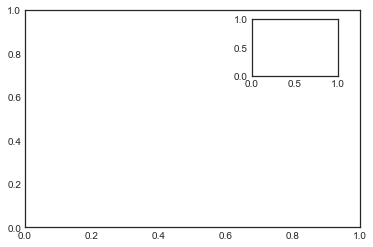

In [7]:
ax1 = plt.axes() # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2]) #that is, starting at 65% of the width 
#and 65% of the height of the figure) and the x and y extents to 0.2 
# (that is, the size of the axes is20% of the width and 20% of 
#the height of the figure.

__OOP Equivalent__

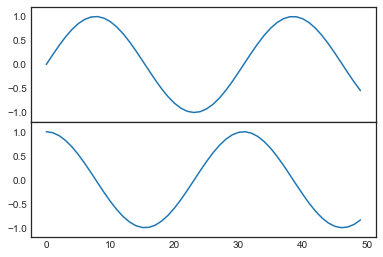

In [23]:
fig = plt.figure() 
ax1 = fig.add_axes([0.1, 0.5,0.8,0.4],
                  xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                  ylim=(-1.2, 1.2))
x = np.linspace(0,10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

### plt.subplot:Simple Grids of Subplots

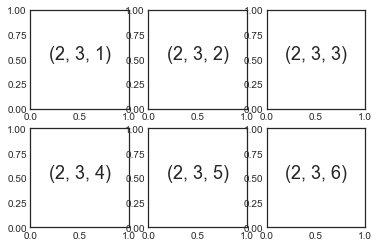

In [26]:
for i in range(1, 7):
    plt.subplot(2,3,i)
    plt.text(0.5,0.5, str((2,3,i)), 
            fontsize=18, ha='center')

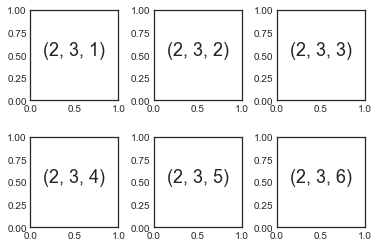

In [32]:
# equivalent OOP with adjustments
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1,7):
    ax = fig.add_subplot(2,3,i)
    ax.text(0.5,0.5, str((2,3,i)),
           fontsize=18, ha='center')

### plt.subplots: The Whole Grid in One Go

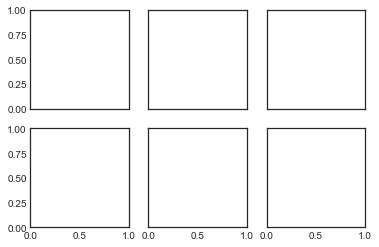

In [33]:
fig, ax = plt.subplots(2,3,sharex='col', sharey='row')

The resulting grid of axes instances is returned
within a NumPy array

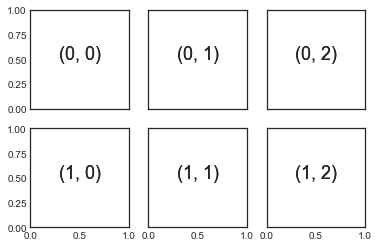

In [35]:
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i,j].text(0.5, 0.5, str((i,j)),
                    fontsize=18, ha='center')
fig

**Note**: In comparison to plt.subplot(), plt.subplots() is more consistent with Python’s conventional 0-based indexing.

### plt.GridSpec: More Complicated Arrangements
To go beyond a regular grid to subplots that span multiple rows and columns,
plt.GridSpec() is the best tool

In [37]:
# plt.GridSpec() object does not create a plot by itself but it's simply a
# convenience interface recognized by plt.subplot()
grid = plt.GridSpec(2,3, wspace=0.4, hspace=0.3)

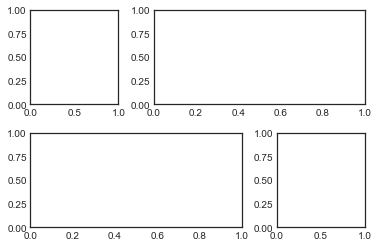

In [38]:
plt.subplot(grid[0, 0])
plt.subplot(grid[0,1:])
plt.subplot(grid[1,:2])
plt.subplot(grid[1,2]);

__Example:__

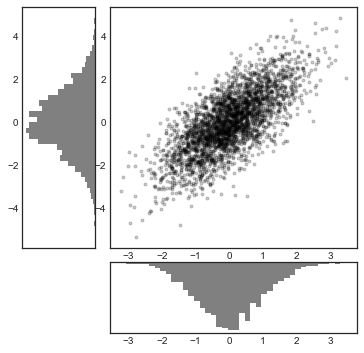

In [53]:
# create some normaally distibuted data
mean = [0,0]
cov = [[1,1], [1,2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# set up the axes with gridspec
fig = plt.figure(figsize=(6,6))
grid = plt.GridSpec(4,4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)

# scatter points on the main axis
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attahced axes
x_hist.hist(x, 40, histtype='stepfilled',
           orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
           orientation='horizontal', color='gray')
y_hist.invert_xaxis()

__This can be easily acheived with an API in Seaborn__